In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# if os.path.exists("/content/train_images"):
#     print("目錄存在")
# else:
#     # os.makedirs("/content/train_data")
#     !cp -r "/content/drive/MyDrive/train_data/rust_detect/train_images" "/content"
#     print("目錄不存在")

In [ ]:
# if os.path.exists("/content/test_data"):
#     print("目錄存在")
# else:
#     # os.makedirs("/content/test_data")
#     !cp -r "/content/drive/MyDrive/train_data/rust_detect/test_images" "/content"
#     print("目錄不存在")



In [ ]:
import zipfile

# 指定zip檔案的路徑
train_zip_path = "/content/drive/MyDrive/train_images.zip"
test_zip_path = "/content/drive/MyDrive/test_images.zip"

if os.path.exists("/content/train_images"):
    print("目錄存在")
else:
    # os.makedirs("/content/train_data")
    print("目錄不存在")

    # 指定解壓縮後的目錄路徑
    extracted_folder_path = "/content"
    # 解壓縮zip檔案
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)
    
    print("建立成功")

if os.path.exists("/content/test_images"):
    print("目錄存在")
else:

    print("目錄不存在")

    # 指定解壓縮後的目錄路徑
    extracted_folder_path = "/content"
    # 解壓縮zip檔案
    with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)
    
    print("建立成功")


# 指定解壓縮後的目錄路徑
extracted_folder_path = "/content"

# 解壓縮zip檔案
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


目錄存在
目錄存在


In [ ]:
# 讀取資料
train_data = []
for img_id in range(0, 2528):  #2528
    train_img = cv2.imread('/content/train_images/train_' + str(img_id).zfill(5) + '.png') #/content/drive/MyDrive/train_data/rust_detect/train_images
    train_img = cv2.resize(train_img, (150, 150)) 
    train_data.append(train_img)
    # print("train_" + str(img_id).zfill(5))
train_data = np.array(train_data) / 255.0

print(train_data.shape)



(2528, 150, 150, 3)


In [ ]:
# 讀取 label csv
import pandas as pd

train_label = []
# 讀取CSV檔案
df = pd.read_csv('/content/train.csv')

# 指定要讀取的資料行，這裡假設label所在的欄位名稱為 'label'
labels = df['Label'].tolist()
names = df['ID'].tolist()
# 指定要開始讀取label的索引位置，這裡從索引2開始讀取
start_index = 0

# 按照指定的順序讀取label
for i in range(start_index, len(labels)):#len(labels)
    # name = names[i]
    label = labels[i]
    train_label.append(label)
print(train_label[:20])


[0, 1, 1, 5, 5, 5, 3, 0, 3, 5, 3, 5, 3, 3, 1, 1, 1, 1, 5, 1]


In [ ]:
# 合併 data and label

In [ ]:
# preprocessing
train_label_OneHot = tf.keras.utils.to_categorical(train_label)
print(train_label_OneHot[:10])
    # 計算權重
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(train_label_OneHot, axis=1)
print(y_integers[:10])
#class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
class_weights = compute_class_weight(class_weight = 'balanced' , classes=np.unique(train_label), y=train_label)
print(class_weights)
d_class_weights = dict(enumerate(class_weights))
print(d_class_weights)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[0 1 1 5 5 5 3 0 3 5]
[0.62512364 0.85636856 4.21333333 1.11463845 1.75555556 0.65424431]
{0: 0.6251236399604352, 1: 0.8563685636856369, 2: 4.213333333333333, 3: 1.1146384479717812, 4: 1.7555555555555555, 5: 0.6542443064182195}


In [ ]:
label_dict = {
    0: 'normal',
    1: 'void',
    2: 'horizontal defect',
    3: 'vertical defect',
    4: 'edge defect',
    5: 'particle'
}

# 假設你有測試集的標籤 test_labels

# 轉換標籤為numpy array
train_label = np.array(train_label)

# 使用numpy的unique函數獲取唯一的標籤和對應的計數
unique_labels, counts = np.unique(train_label, return_counts=True)

# 顯示每個標籤的計數
for label, count in zip(unique_labels, counts):
    print(f"Label {label_dict[label]}: 有{count} 張資料")

Label normal: 有674 張資料
Label void: 有492 張資料
Label horizontal defect: 有100 張資料
Label vertical defect: 有378 張資料
Label edge defect: 有240 張資料
Label particle: 有644 張資料


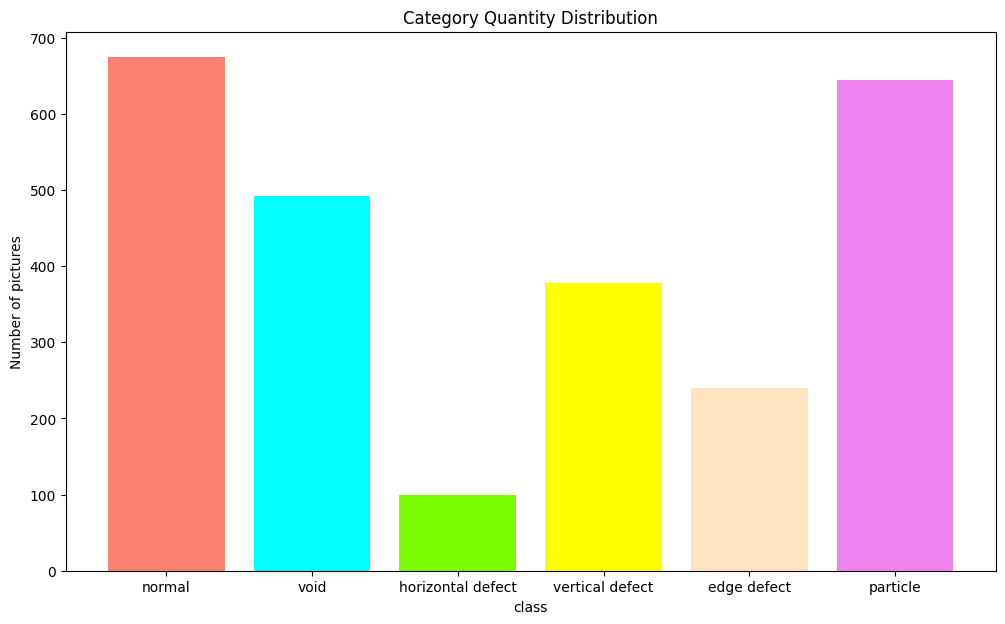

In [ ]:
import matplotlib.pyplot as plt

# 假設你有每個分類的數量 counts 和對應的標籤 labels

# 設置橫軸和縱軸的數據
x = ["normal","void","horizontal defect","vertical defect","edge defect","particle"]
y = [674,492,100,378,240,644]

colors = ['salmon', 'cyan', 'lawngreen', 'yellow' ,'bisque' , 'violet']
fig, ax = plt.subplots(figsize=(12, 7))
# 繪製直方圖
plt.bar(x, y 
        , color=colors
        )

# 添加標籤和標題
plt.xlabel('class')
plt.ylabel('Number of pictures')
plt.title('Category Quantity Distribution')

# 顯示圖形
plt.show()

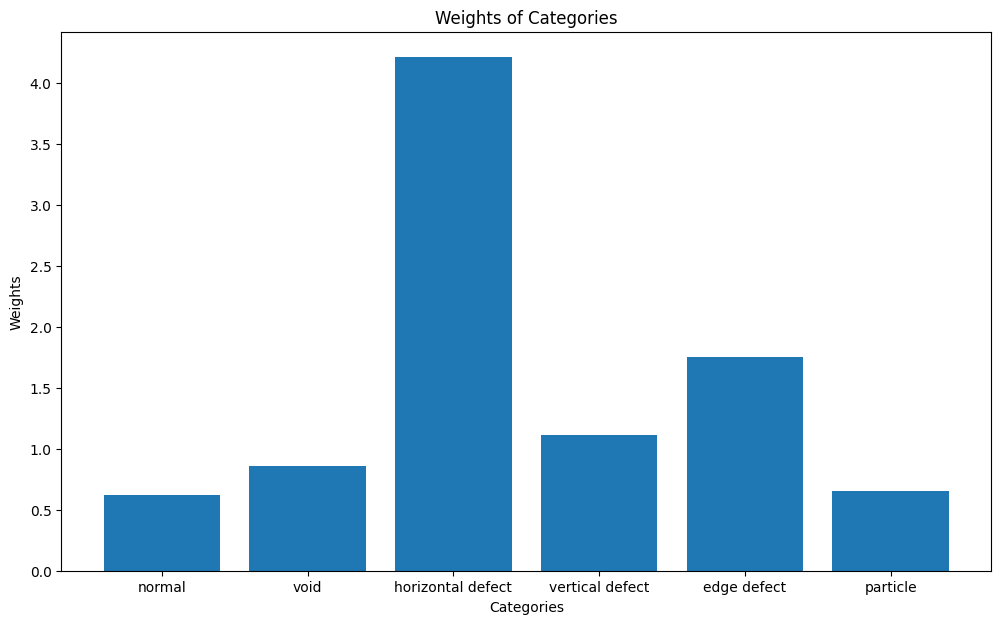

In [ ]:
import matplotlib.pyplot as plt




# 提取類別標籤和權重值
labels = ["normal","void","horizontal defect","vertical defect","edge defect","particle"]
values = list(d_class_weights.values())

fig, ax = plt.subplots(figsize=(12, 7))
# 繪製柱狀圖
plt.bar(labels, values)

# 添加標題和軸標籤
plt.title("Weights of Categories")
plt.xlabel("Categories")
plt.ylabel("Weights")

# 顯示圖表
plt.show()


In [ ]:
# # build model

# #/content/2021-11-02_1007_0.png
# # Step 2. 建立模型

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

# model = Sequential()

# # 卷積層1與池化層1

# model.add(Conv2D(filters=32,kernel_size=(3,3),
#                  input_shape=(150, 150,3), 
#                  activation='relu', 
#                  padding='same'))

# model.add(Dropout(rate=0.25))

# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 卷積層2與池化層2

# model.add(Conv2D(filters=32, kernel_size=(3, 3), 
#                  activation='relu', padding='same'))

# model.add(Dropout(0.25))

# model.add(MaxPooling2D(pool_size=(2, 2)))


# # 卷積層3與池化層3

# model.add(Conv2D(filters=64, kernel_size=(3, 3), 
#                  activation='relu', padding='same'))

# model.add(Dropout(0.25))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# # Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

# model.add(Flatten())
# model.add(Dropout(rate=0.25))

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(rate=0.25))

# model.add(Dense(6, activation='softmax'))

# print(model.summary())


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_select = "resnet" #   resnet

# 載入預訓練的VGG16模型，去掉最上層的分類器
if model_select == "vgg16":
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
elif model_select == "resnet":
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
elif model_select == "densenet":
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
elif model_select == "effnet":
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# 新建一個Sequential模型
model = Sequential()

# 將VGG16模型加入到新的Sequential模型中
model.add(base_model)

# 加上新的分類器
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 鎖定VGG16模型的權重不更新
for layer in base_model.layers:
    layer.trainable = False

print(model.summary())
# 編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 36,673,798
Trainable params: 13,108,998
Non-trainable params: 23,564,800
_________________________________________________________________
None


In [ ]:
# train model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
train_history=model.fit(train_data, train_label_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1
                        ,class_weight= d_class_weights)   

Epoch 1/10
16/16 [==============================] - 6s 151ms/step - loss: 1.8254 - acc: 0.7760 - val_loss: 0.1765 - val_acc: 0.9625
Epoch 2/10
16/16 [==============================] - 1s 81ms/step - loss: 0.1136 - acc: 0.9812 - val_loss: 0.1151 - val_acc: 0.9802
Epoch 3/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0355 - acc: 0.9906 - val_loss: 0.1356 - val_acc: 0.9783
Epoch 4/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0107 - acc: 0.9985 - val_loss: 0.0905 - val_acc: 0.9822
Epoch 5/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0938 - val_acc: 0.9783
Epoch 6/10
16/16 [==============================] - 1s 81ms/step - loss: 5.3205e-04 - acc: 0.9995 - val_loss: 0.0866 - val_acc: 0.9842
Epoch 7/10
16/16 [==============================] - 1s 82ms/step - loss: 3.4741e-04 - acc: 1.0000 - val_loss: 0.0868 - val_acc: 0.9862
Epoch 8/10
16/16 [==============================] - 1s 81ms/step - loss: 1

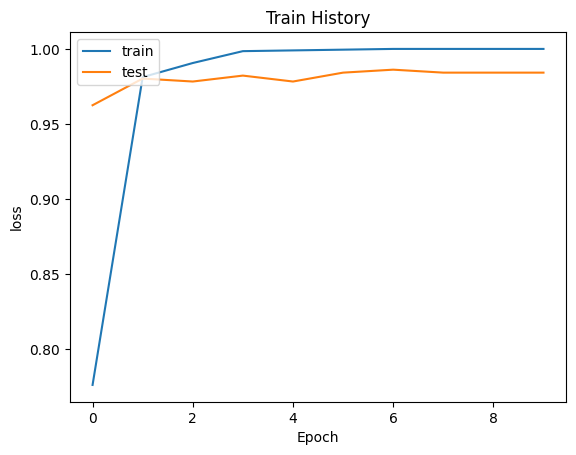

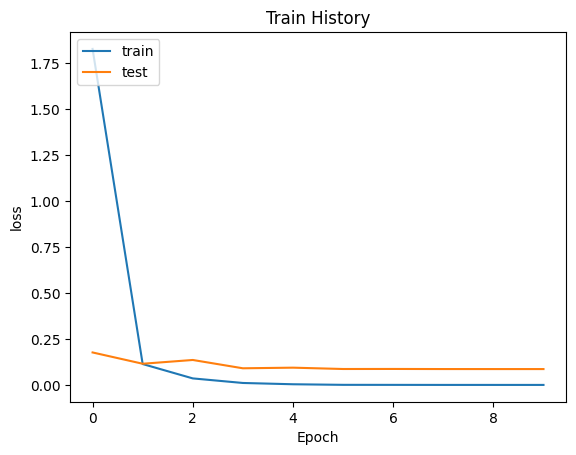

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')
show_train_history('loss','val_loss')

In [ ]:
# 載入測試圖片並進行預處理
test_data = []
for img_id in range(0, 10142):
    test_img = cv2.imread('/content/test_images/test_' + str(img_id).zfill(5) + '.png')#/content/drive/MyDrive/train_data/rust_detect/test_images
    test_img = cv2.resize(test_img, (150, 150))  # 修正此行代码，将`img`更改为`test_img`
    test_data.append(test_img)
test_data = np.array(test_data) / 255.0

print(test_data.shape)



(10142, 150, 150, 3)


In [ ]:
# predict test data

label_dict = {
    0: 'normal',
    1: 'void',
    2: 'horizontal defect',
    3: 'vertical defect',
    4: 'edge defect',
    5: 'particle'
}


import cv2
import numpy as np
import pandas as pd

# 預測測試圖片的標籤
predict_x = model.predict(test_data)
pred = np.argmax(predict_x, axis=1)

# 生成提交的DataFrame
data = {'ID': [], 'Label': []}
for i in range(len(pred)):
    img_id = 'test_' + str(i).zfill(5) + '.png'
    data['ID'].append(img_id)
    data['Label'].append(pred[i])

# 將結果寫入CSV檔案（分批）
batch_size = 1000
num_batches = len(pred) // batch_size + 1
for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size
    batch_data = {key: values[start_idx:end_idx] for key, values in data.items()}
    df = pd.DataFrame(batch_data)
    if batch == 0:
        df.to_csv('/content/test.csv', index=False)
    else:
        df.to_csv('/content/test.csv', mode='a', header=False, index=False)

print("Finish")

317/317 [==============================] - 6s 18ms/step
Finish


In [ ]:
import pandas as pd

data = pd.read_csv('test.csv')
test_label = data.iloc[:, 1]
#print(test_label)
print(test_label[0])


1


In [ ]:
for i in range(0,25):
  print(test_label[i])

1
0
5
0
2
5
5
5
0
2
3
0
0
1
1
0
0
5
0
0
4
1
4
5
0


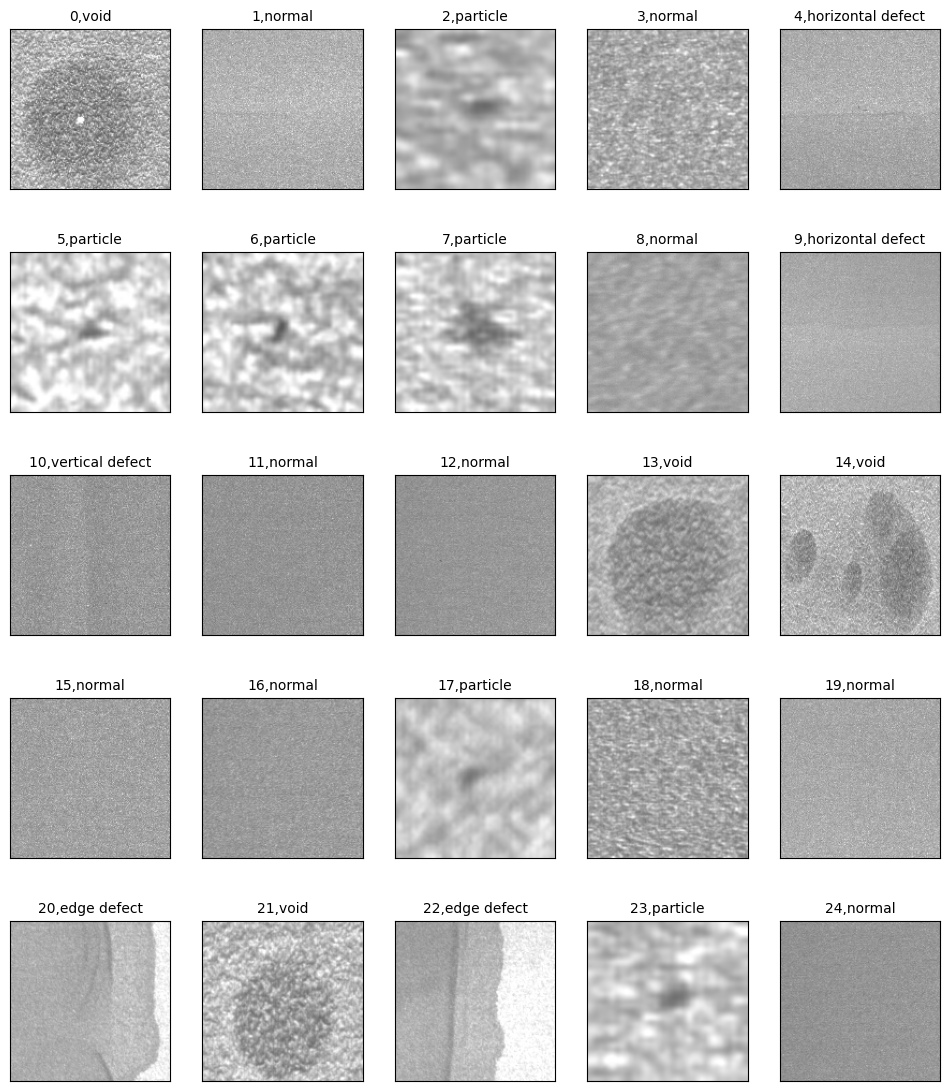

"\n    0: 'normal',\n    1: 'void',\n    2: 'horizontal defect',\n    3: 'vertical defect',\n    4: 'edge defect',\n    5: 'particle'\n"

In [ ]:
def plot_images_labels_prediction(images,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[test_label[i]]
        # if len(prediction)>0:
            # print(label_dict[np.argmax(prediction[i])])
            # title+='=>'+label_dict[np.argmax(prediction[i])]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(test_data,pred,0,25)
"""
    0: 'normal',
    1: 'void',
    2: 'horizontal defect',
    3: 'vertical defect',
    4: 'edge defect',
    5: 'particle'
"""

In [ ]:
# # 資料夾路徑
# folder_path = "/content/test_images"

# # 讀取圖片的批次大小
# batch_size = 32

# # 讀取資料夾中的所有圖片檔案
# image_files = os.listdir(folder_path)

# image_files_with_numbers = [(file, int(file.split('_')[1].split('.')[0])) for file in image_files]

# # 根據數字部分的整數值對清單進行排序
# sorted_image_files = sorted(image_files_with_numbers, key=lambda x: x[1])

# print(sorted_image_files[:10])

# for i in range(0, len(sorted_image_files), batch_size):
#     batch = sorted_image_files[i:i+batch_size]
#     batch_paths = [os.path.join(folder_path, image_file) for image_file, _ in batch]
#     images = []

#     for file in batch_paths:
#         image_path = os.path.join(folder_path, file)
#         image = cv2.imread(image_path)
#         images.append(image)
#     images = np.array(images)
#     # print(images.shape) 




#     del images
# # # 分批次讀取圖片
# # for i in range(0, len(image_files), batch_size):
# #     batch = image_files[i:i+batch_size]  # 取出一個批次的圖片檔案

# #     # 讀取批次中的圖片
# #     images = []
# #     for file in batch:
# #         image_path = os.path.join(folder_path, file)
# #         image = cv2.imread(image_path)
# #         images.append(image)

# #     # 在這裡對讀取的圖片進行預測或其他處理

# #     # 釋放記憶體
# #     del images


